# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [4]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [5]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [6]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [7]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total] # your code here

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [8]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx] # your code here

The following two cells ensure automatic grading.

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [9]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [10]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [11]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

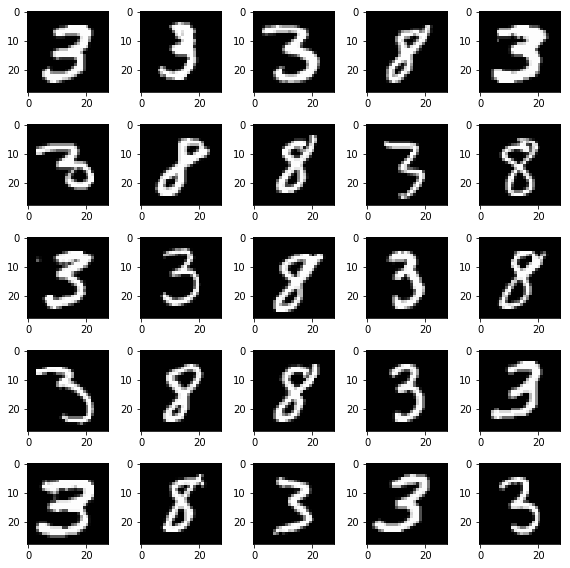

In [12]:
plt.figure(figsize=(8,8))
a, b = 5, 5
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [13]:
y_train[:20]

array([3, 3, 3, 8, 3, 3, 8, 8, 3, 8, 3, 3, 8, 3, 8, 3, 8, 8, 3, 3], dtype=uint8)

## Task 1
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [14]:
def flatten_image(X):
    # your code here
    return X.flatten()

In [15]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test]) # your code here
X_train_flat.shape, X_test_flat.shape

((11982, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [16]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

***Answer***

PSA method is sensitive to abnormalities. If the ranges of features (vectors) differ greatly, then larger features will dominate over smaller ones.  
For example, a feature with a range from 0 to 1000 will dominate a feature in the range from 0 to 10. So applying PSA without standardization will lead to biased results.  
Therefore, before using PSA, we need use normalization of features, for example, standardization through the mean vector of the sample and standard deviation (as one of the methods of data normalization).

The experiments below show that the accuracy of the *LinearSVC classifier* on the scaled data is higher than on the non-scaled data.

In [17]:
# training on non-scaled data

X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])

# PCA
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)

# SVM
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

y_pred = clf.predict(X_test_flat)
acc_non_scl = accuracy_score(y_pred, y_test)


In [18]:
# training on scaled data

X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])

# Scaling
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# PCA
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)

# SVM
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

y_pred = clf.predict(X_test_flat)
acc_scl = accuracy_score(y_pred, y_test)


In [19]:
print("Non-scaled data. Test accuracy:\t", round(acc_non_scl, 4))
print("Scaled data. Test accuracy:\t", round(acc_scl, 4))

Non-scaled data. Test accuracy:	 0.9446
Scaled data. Test accuracy:	 0.9662


Now, we call PCA and reduce the number of components for each vector. 

In [20]:
# reload samples before PCA
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])
X_train_flat.shape, X_test_flat.shape

scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

In [21]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [22]:
X_test_flat = pca.transform(X_test_flat)

In [23]:
X_train_flat.shape, X_test_flat.shape

((11982, 128), (1984, 128))

## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

***Answer:***  
784/128 = 6.125

In [24]:
784/X_test_flat.shape[1]

6.125

Now, we use SVM with linear kernel to separate the two classes.

In [25]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

CPU times: user 2.39 s, sys: 0 ns, total: 2.39 s
Wall time: 2.39 s


Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [26]:
y_pred = clf.predict(X_test_flat) # your code here
acc = accuracy_score(y_pred, y_test) # your code here
print("Test accuracy: ", acc)

Test accuracy:  0.96622983871


## Custom input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name. 

In [27]:
from scipy import misc
from PIL import Image

In [28]:
image = Image.open('3.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

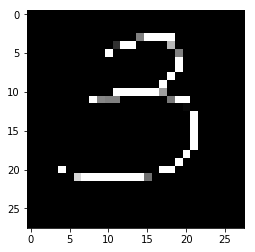

In [29]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction. 

In [30]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [31]:
clf.predict(custom)

array([3], dtype=uint8)

## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

In [32]:
array_right = []
count = 0

for i in range(10):
    image = Image.open(str(i) + '.png').convert('L')
    compressed_image = image.resize((28, 28))
    custom = np.array(compressed_image)
    custom = flatten_image(custom).reshape(1, -1)
    custom = scaler.transform(custom)
    custom = pca.transform(custom)
    prediction = clf.predict(custom)[0]
    
    if i == prediction:
        array_right.append(i)
        count += 1
    print('Number:', i, '| predict:', prediction)

print('=========================')
print('Correct predictions:', count,"(out of 10 numbers)")
print('Accuracy: ', round(100*count/10, 2), "%", sep='')
print('Array with right predictions:', array_right)

Number: 0 | predict: 3
Number: 1 | predict: 8
Number: 2 | predict: 8
Number: 3 | predict: 3
Number: 4 | predict: 3
Number: 5 | predict: 3
Number: 6 | predict: 3
Number: 7 | predict: 3
Number: 8 | predict: 8
Number: 9 | predict: 3
Correct predictions: 2 (out of 10 numbers)
Accuracy: 20.0%
Array with right predictions: [3, 8]


## Task 2
Now let's try another approach explained [here](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.
Please note that due to large shapes of matrices the operations might take a while.

In [33]:
def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    U, S, V_t = svd(matrix)
    return U[:, :number] # return first _number_ columns of U from SVD of _matrix_

In [35]:
def getSingularImage(X_train, y_train, number):
    # find images whose target is _number_
    
    index_array = [i == number for i in y_train]   
    select_images = X_train[index_array]
    A = None 
    
    for image in select_images:
        # iteratively append new column to form matrix A
        flatten = np.array([flatten_image(image)])
        if A is None:
            A = flatten.T
        else:
            A = np.append(A, flatten.T, axis=1)

    # left_basis = # get left singular vectors
    left_basis = getSingularVectorsLeft(A, number=10)

    return left_basis

Try it first on "0".

In [36]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis.shape, (784, 10)

### Task 2.1
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

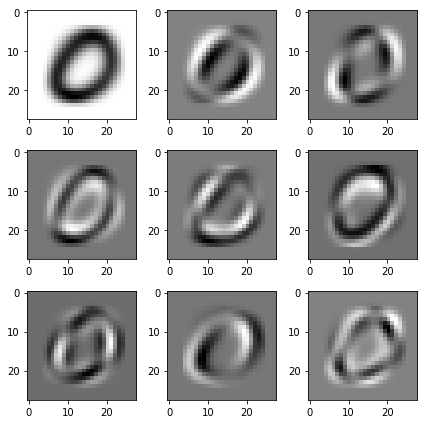

In [37]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [38]:
# for digit "2"
left_basis = getSingularImage(X_train_total, y_train_total, 2)
assert left_basis.shape, (784, 10)

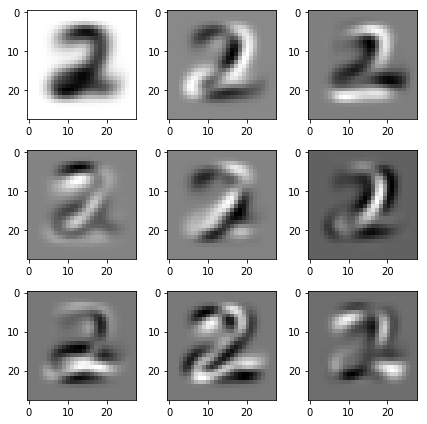

In [39]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [40]:
# for digit "5"
left_basis = getSingularImage(X_train_total, y_train_total, 5)
assert left_basis.shape, (784, 10)

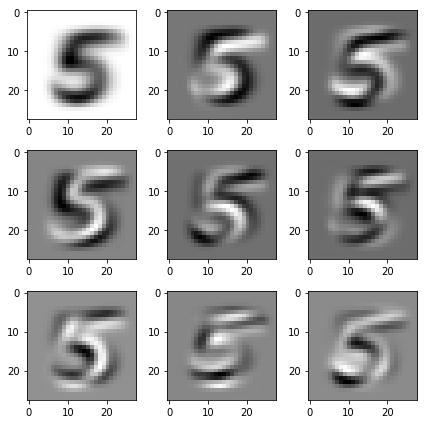

In [41]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

***Answer***

1. The vectors of the matrix $U_k$ contain features by which the numbers in the picture are recognized.


2. Pictures are a collection of pixels. The contours of the numbers in the picture are contrasting areas in the picture, i.e. darkest pixels.


3. The vectors of the matrix $U_k$ contain features that describe the contrasting areas of pixels in the picture, i.e. contours of numbers.


4. The first vector of the matrix $U_k$ corresponds to the maximum eigenvalue in the singular value decomposition. This vector has the greatest generalizing ability, i.e. contains the most common contours of the selected digit among all pictures with this digit.


5. Since in the singular value decomposition the eigenvalues are in decreasing order, the later vectors of the matrix $U_k$ will correspond to smaller eigenvalues. Such vectors will have less generalizing ability, i.e. it will be bad to highlight signs for all pictures with the selected number. The figures above show that for the *9th vector* of the matrix $U_k$, the number "**0**" looks like a ball of yarn. This demonstrates that in this vector, many features are allocated for individual images, which together are similar to "white noise", i.e. have low generalizing and predictive power.

___________________________

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [42]:
number_basis_matrices = [] # use getSingularImage funciton to get matrices for all numbers

print("digit:")

for i in range(10):
    number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, i))
    print(i)

print('\nNumber of vectors in U_k:', len(number_basis_matrices))

digit:
0
1
2
3
4
5
6
7
8
9

Number of vectors in U_k: 10


### Task 2.2
Plot the first singular image of each digit, similarly to the previous task.

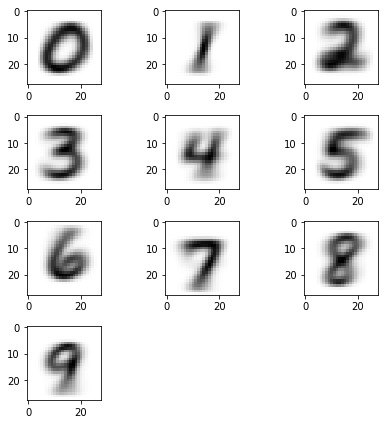

In [43]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:,0].reshape((28,28)) # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [44]:
dim = number_basis_matrices[0].shape[0]

### Task 2.3

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [45]:
numeric_values = [] # create an array of pr for each number

for i in range(10):
    pr_matrix = np.identity(number_basis_matrices[i].shape[0]) - np.matmul(number_basis_matrices[i], number_basis_matrices[i].T)
    numeric_values.append(pr_matrix)

### Task 2.4
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [46]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1)
    # find closest U_k to test_value using norm and return the target digit
    pr_matrix_dict = {}
    for i, value in enumerate(numeric_values):
        pr_matrix_dict[i] = np.linalg.norm(np.matmul(value, stacked_test))
    
    target = min(pr_matrix_dict, key = lambda k: pr_matrix_dict[k])

    return target

In [47]:
# find array of predictions for test values and calculate accuracy in the cell below
y_pred = [find_closest(image, numeric_values) for image in X_test]

In [48]:
acc = accuracy_score(y_test, y_pred)
print('accuracy:', acc)

accuracy: 0.930443548387


In [59]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("rZkTW", acc)

In [60]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Additional task
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [49]:
# flatten
X_train_flat = np.array([flatten_image(img) for img in X_train_total])
X_test_flat = np.array([flatten_image(img) for img in X_test_total])
X_train_flat.shape, X_test_flat.shape

((60000, 784), (10000, 784))

In [50]:
# Scandart Scaler
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

In [51]:
# PCA
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)
X_train_flat.shape, X_test_flat.shape

((60000, 128), (10000, 128))

In [52]:
# LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [53]:
%%time
clf = OneVsRestClassifier(LinearSVC(random_state = 42))
clf.fit(X_train_flat, y_train_total)
y_predict = clf.predict(X_test_flat)

CPU times: user 3min 28s, sys: 0 ns, total: 3min 28s
Wall time: 3min 28s


In [54]:
acc = accuracy_score(y_test_total, y_predict) # calculate accuracy
print("Accuracy of LinearSVC for 10 numbers classifier:", acc, sep='\n')

Accuracy of LinearSVC for 10 numbers classifier:
0.9093


***Findings:***

1. The accuracy for predicting 10 digits is lower than the accuracy for predicting 2 digits (***3*** and ***8***).


2. Despite the fact that the numbers ***3*** and ***8*** are very similar, the prediction accuracy for them is higher than for 10 numbers. This is due to the fact that among the 10 digits there are many similar pairs: ***0*** and ***6***, ***0*** and ***8***, ***0*** and ***9***, ***2*** and ***7***, ***3*** and ***8***, ***3*** and ***9***, ***4*** and ***7***, ***5*** and ***8***, etc.


________________________________

~ *Prepared by the student: Afanasiev Sergey* ~